# **Project Data Sains**
**Kelas : IF - C**

**NIM / Nama:**
- 123230014 / Randra Ferdian Saputra
- 123230030 / Reza Rasendriya Adi Putra  
- 1232300119 / Rifqi Rahardian

# Analisis Data Eksploratif: Prediksi Penyakit Jantung

Notebook ini berisi analisis data eksploratif (EDA) pada dataset **Heart Disease UCI**.

---

### **Tujuan Analisis:**
Analisis ini bertujuan untuk:
1. Memahami karakteristik setiap atribut (fitur) dari data pasien.
2. Mengidentifikasi pola dan hubungan antara berbagai fitur medis dengan diagnosis penyakit jantung (`target`).
3. Menemukan wawasan awal yang dapat digunakan sebagai dasar untuk membangun model prediksi *machine learning*.

---

### **Daftar Isi:**
1. **Pendahuluan & Kamus Data**
2. **Memuat Pustaka dan Data**
3. **Pemahaman Awal Data** (Melihat `head`, `info`, `shape`)
4. **Kualitas Data** (Pengecekan *Missing Values* & Duplikat)
5. **Analisis Data Eksploratif (EDA)**
    - 5.1. Analisis Univariat (Melihat distribusi setiap fitur)
    - 5.2. Analisis Bivariat (Melihat hubungan antar fitur, terutama terhadap `target`)
    - 5.3. Analisis Multivariat (Melihat korelasi antar semua fitur numerik)
6. **Kesimpulan Awal**

## 1. Pendahuluan & Kamus Data
Dataset ini berisi **303 baris data pasien** dengan 14 atribut yang digunakan untuk memprediksi keberadaan penyakit jantung.

Variabel `target` adalah tujuan prediksi kita, di mana:
- `1`: Pasien **terdiagnosis** penyakit jantung
- `0`: Pasien **tidak** terdiagnosis penyakit jantung

Berikut adalah penjelasan untuk setiap atribut:

#### **Fitur Demografi & Umum:**
- `age`: Usia pasien (tahun).
- `sex`: Jenis kelamin (`1` = Laki-laki, `0` = Perempuan).

#### **Hasil Pengukuran Klinis:**
- `trestbps`: Tekanan darah saat istirahat (mm Hg).
- `chol`: Kadar kolesterol serum (mg/dl).
- `fbs`: Gula darah puasa > 120 mg/dl (`1` = Ya, `0` = Tidak).
- `thalach`: Detak jantung maksimum yang tercapai (denyut per menit).

#### **Gejala & Hasil Pemeriksaan Jantung:**
- `cp` (Tipe Nyeri Dada):
  - `0`: *Typical Angina*
  - `1`: *Atypical Angina*
  - `2`: *Non-anginal Pain*
  - `3`: *Asymptomatic*
- `restecg` (Hasil EKG Istirahat):
  - `0`: Normal
  - `1`: Kelainan gelombang ST-T
  - `2`: Hipertrofi ventrikel kiri
- `exang` (Nyeri Dada Akibat Latihan): (`1` = Ya, `0` = Tidak).
- `oldpeak`: Depresi ST akibat latihan relatif terhadap istirahat.
- `slope` (Kemiringan Puncak Latihan ST):
  - `0`: *Upsloping*
  - `1`: *Flat*
  - `2`: *Downsloping*
- `ca`: Jumlah pembuluh darah utama yang terwarnai (0-4).
- `thal` (Hasil Thallium Stress Test):
  - `0`: Null
  - `1`: Normal
  - `2`: Cacat Tetap (*Fixed Defect*)
  - `3`: Cacat Reversibel (*Reversible Defect*)

## 2. Memuat Pustaka dan Data
Langkah pertama adalah mengimpor *library* yang dibutuhkan (pandas, matplotlib, seaborn) dan memuat dataset `heart.csv` ke dalam DataFrame.

In [ ]:
!pip install pywaffle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from pywaffle import Waffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Datasets
path = '/content/drive/MyDrive/Datasets/heart.csv'
df = pd.read_csv(path)

## 3. Pemahaman Awal Data
Kita akan melihat beberapa baris pertama data, informasi umum, dan dimensi data untuk mendapatkan gambaran awal.

### Menampilkan 5 Baris Pertama Data

In [ ]:
#load Datasets
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Informasi Umum dan Tipe Data
`df.info()` memberikan ringkasan tipe data setiap kolom dan jumlah data non-null. Ini berguna untuk mendeteksi data hilang secara cepat.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Dari output di atas, kita dapat melihat:
- Dataset terdiri dari 303 baris dan 14 kolom.
- **Tidak ada nilai yang hilang (missing values)** di setiap kolom.
- Sebagian besar tipe data adalah `int64`, dan satu `float64` (`oldpeak`).


In [ ]:
#Membagi Dataset menjadi Categorical dan Numerical
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
df[categorical_features].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


## 4. Kualitas Data
Pada tahap ini, kita akan memeriksa dan menangani jika ada data yang hilang atau data duplikat.

### Pengecekan Missing Values
Meskipun `df.info()` sudah menunjukkan tidak ada data hilang, kita konfirmasi kembali dengan `isnull().sum()`.

In [ ]:
#Mising Values
df.isnull().sum().to_frame(name='missing_value').T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
missing_value,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### **Visualisasi Outlier dengan Boxplot**
Boxplot sangat efektif untuk melihat sebaran data dan mendeteksi pencilan (*outliers*).

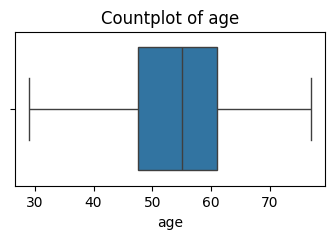

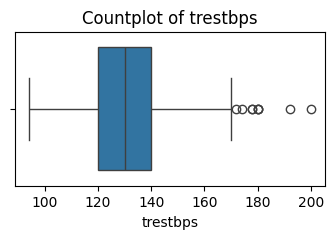

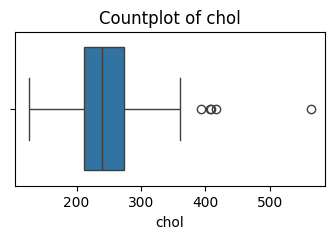

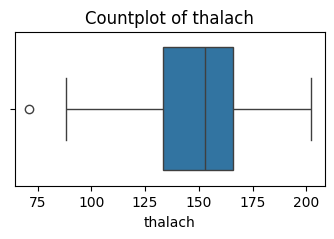

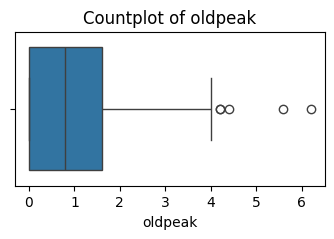

In [ ]:
#OUTLIERS
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.show()

In [ ]:
#Data Duplicate
df.duplicated().sum()

np.int64(1)

Terdapat **1 baris data yang terduplikasi**. Data ini dapat dihapus pada tahap *pre-processing* sebelum pemodelan. Untuk saat ini, kita akan membiarkannya agar tidak mengubah jumlah data asli saat eksplorasi.

## 5. Analisis Data Eksploratif (EDA)
Kita akan menganalisis data untuk menemukan pola dan wawasan.


### 5.1. Analisis Univariat
Menganalisis setiap variabel secara individual untuk memahami distribusinya.

#### **A. Distribusi Fitur Kategorik**
Kita lihat frekuensi dari setiap kategori pada fitur-fitur ini.

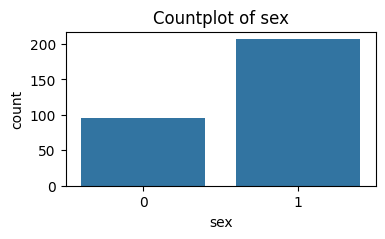

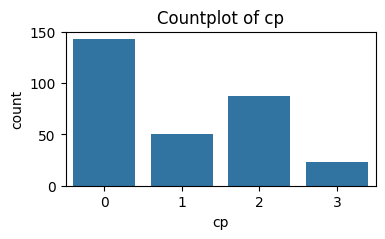

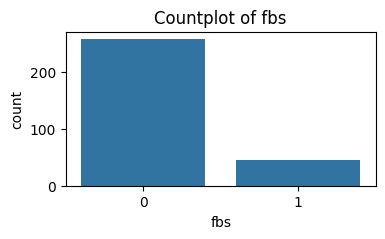

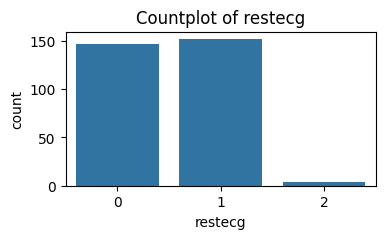

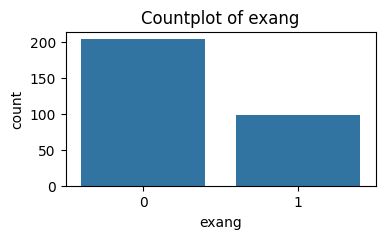

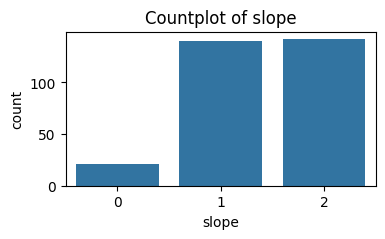

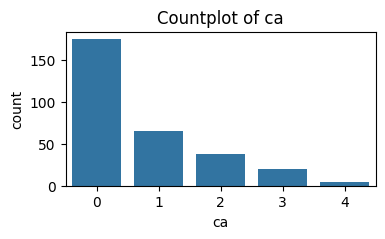

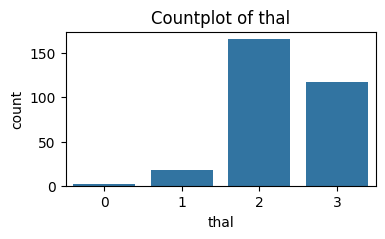

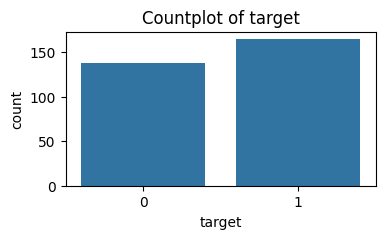

In [ ]:
#UNIVARIATE EDA CATEGORICAL
for feature in categorical_features:
    plt.figure(figsize=(4,2))
    sns.countplot(data=df, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.show()

#### **B. Distribusi Fitur Numerik**
Melihat ringkasan statistik dan distribusi data numerik untuk mengidentifikasi rentang nilai dan potensi *outlier*.

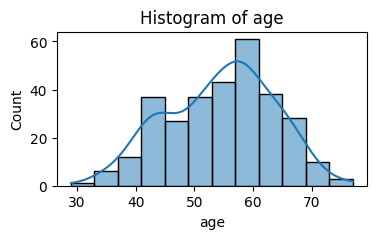

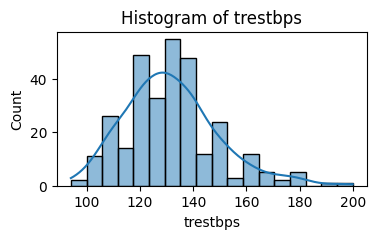

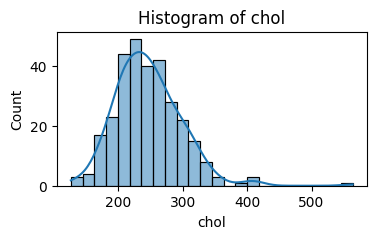

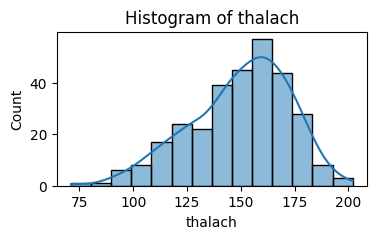

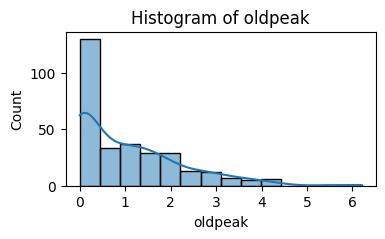

In [ ]:
#UNIVARIATE EDA NUMERICAL
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

### 5.2. Analisis Bivariat (Terhadap Target)
Menganalisis hubungan antara setiap fitur dengan variabel target (`target`).

#### **A. Fitur Kategorik vs Target**
Kita ingin tahu bagaimana diagnosis penyakit jantung (`target`) didistribusikan di setiap kategori.

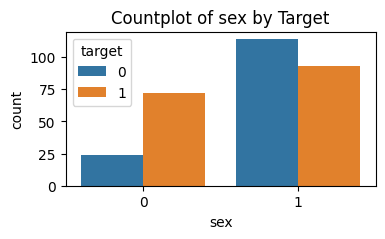

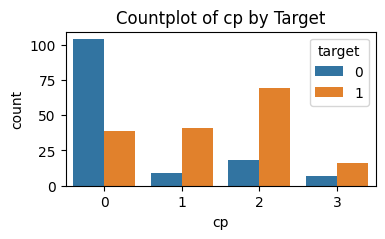

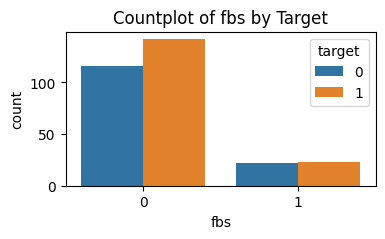

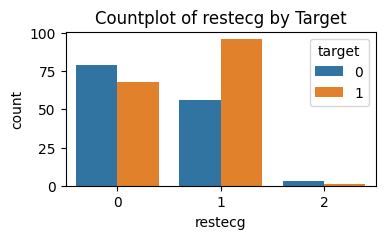

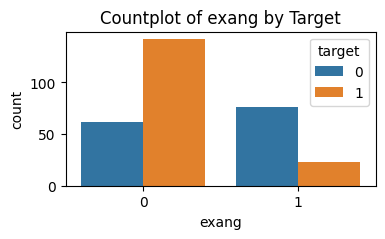

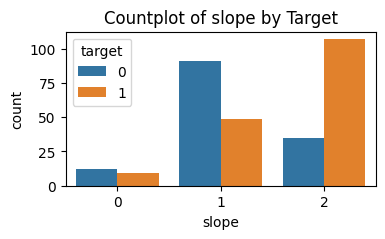

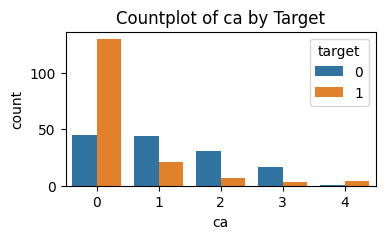

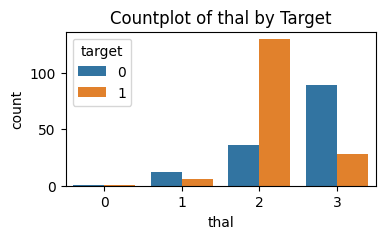

In [ ]:
#BIVARIATE EDA CATEGORICAL terhadap target
for feature in categorical_features:
    if feature != 'target':
        plt.figure(figsize=(4,2))
        sns.countplot(data=df, x=feature, hue='target')
        plt.title(f'Countplot of {feature} by Target')
        plt.show()

#### **B. Fitur Numerik vs Target**
Melihat bagaimana distribusi fitur numerik berbeda antara pasien yang didiagnosis penyakit jantung dan yang tidak.

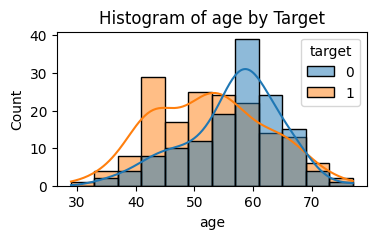

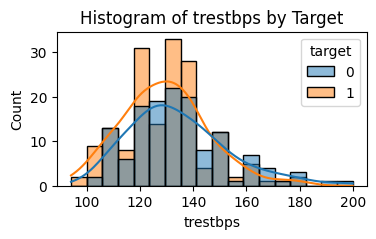

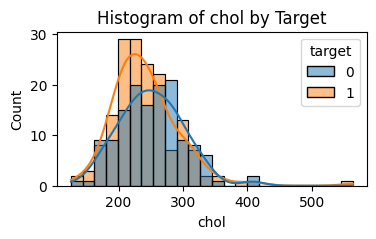

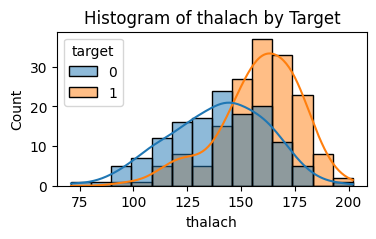

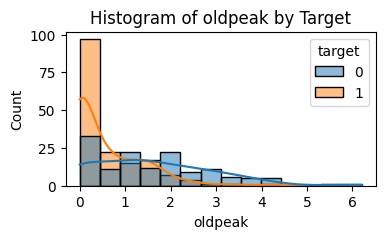

In [ ]:
#BIVARIATE EDA NUMERICAL terhadap taget
for feature in numerical_features:
    plt.figure(figsize=(4,2))
    sns.histplot(data=df, x=feature, hue='target', kde=True)
    plt.title(f'Histogram of {feature} by Target')
    plt.show()

### 5.3. Analisis Multivariat
Melihat hubungan antara beberapa variabel secara bersamaan.



#### **Matriks Korelasi Fitur Numerik**
*Heatmap* korelasi membantu kita melihat seberapa kuat hubungan linear antar variabel numerik. Nilai mendekati 1 atau -1 menunjukkan korelasi yang kuat.

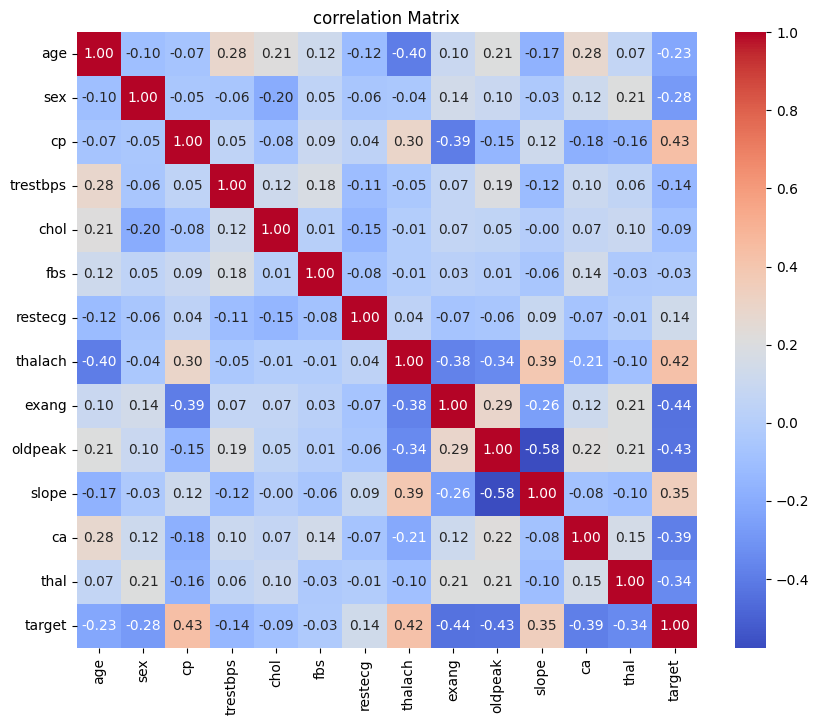

In [ ]:
#MULTIVARIATE EDA MENGGUNAKAN CORORELATION MATRIX
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

#### **Distribusi Tipe Nyeri Dada berdasarkan Jenis Kelamin**

/tmp/ipython-input-842584398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda1_mns.loc[len(df_eda1_mns.index)] = [0, 0, 3, 0]


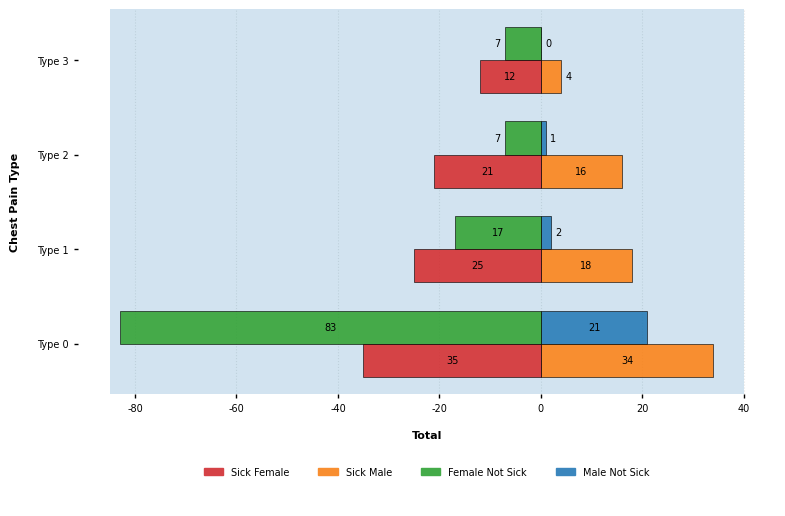

In [ ]:
df_eda1 = df[['sex', 'cp', 'target']]
df_eda1 = pd.DataFrame(df_eda1.groupby(['sex', 'target']).cp.value_counts().reset_index(name='total'))
df_eda1_mns = df_eda1.query(f'sex == 0 & target == 0')
df_eda1_mns.loc[len(df_eda1_mns.index)] = [0, 0, 3, 0]
df_eda1_ms = df_eda1.query(f'sex == 0 & target == 1')
df_eda1_fns = df_eda1.query(f'sex == 1 & target == 0')
df_eda1_fs = df_eda1.query(f'sex == 1 & target == 1')

y = np.arange(len(df_eda1.cp.unique()))
x_ticks = list(np.arange(-80, 60, 20))
x_labels = list(map(str, x_ticks))
y_ticks = list(np.arange(0, 4, 1))

labels_pain_type = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
labels_legend = ['Not Sick', 'Sick']
bar_height = 0.35
bar_style = dict(zorder=3, edgecolor='black', linewidth=0.5, alpha=0.85)
cnt_label = dict(fontsize=7, horizontalalignment='center', verticalalignment='center')
axvspan = dict(alpha=0.2, zorder=2)
tick_params = dict(length=3, width=1)
xy_label = dict(fontweight='bold', fontsize=8)
suptitle = dict(x=0.16, y=0.96, fontsize=13, weight='heavy', ha='left', va='bottom')
title = dict(x=0.16, y=0.93, fontsize=8, weight='normal', ha='left', va='bottom')
highlight_textprops = [{'weight':'bold'}, {'weight':'bold'}]

fig, ax = plt.subplots(figsize=(9, 5))
bar_mns = plt.barh(y+bar_height, df_eda1_mns['total'],  height=bar_height, **bar_style)
bar_ms = plt.barh(y, df_eda1_ms['total'], height=bar_height, **bar_style)
bar_fns = plt.barh(y+bar_height, df_eda1_fns['total']*-1,  height=bar_height, **bar_style)
bar_fs = plt.barh(y, df_eda1_fs['total']*-1, height=bar_height, **bar_style)
ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(labels_pain_type, fontsize=7)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    if width >= 0:
        if width > 10: ax.text(x+width/2, y+height/2, '{:.0f}'.format(width), **cnt_label)
        else: ax.text(x+width+1.5, y+height/2, '{:.0f}'.format(width), **cnt_label)
    elif width < 0:
        if width*-1 > 10: ax.text(x+width/2, y+height/2, '{:.0f}'.format(width*-1), **cnt_label)
        else: ax.text(x+width-1.5, y+height/2, '{:.0f}'.format(width*-1), **cnt_label)
plt.xticks(fontsize=7, ticks=x_ticks, labels=x_labels)
plt.xlabel('\nTotal', **xy_label)
plt.ylabel('Chest Pain Type\n', **xy_label)
plt.grid(axis='y', alpha=0, zorder=2)
plt.grid(axis='x', which='major', alpha=0.3,  linestyle='dotted', zorder=1)
plt.axvspan(-85, 0, **axvspan)
plt.axvspan(40, 0, **axvspan)
leg_fsick = mpatches.Patch(color='#d54246' ,label='Sick Female')
leg_msick = mpatches.Patch(color='#f88e30', label='Sick Male')
leg_fnotsick = mpatches.Patch(color='#44ab49', label='Female Not Sick')
leg_mnotsick = mpatches.Patch(color="#3b86bd", label='Male Not Sick')
plt.legend(handles=[leg_fsick, leg_msick, leg_fnotsick, leg_mnotsick], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, borderpad=3, frameon=False, fontsize=7, columnspacing=3)
plt.tick_params(bottom='on', **tick_params)

ax=plt.gca()
for spine in ax.spines.values():
    spine.set_color('None')
ax.spines['bottom'].set_visible(True)
plt.show();

#### **Usia vs Detak Jantung Maksimum (Thalach) berdasarkan Target dan Jenis Kelamin**

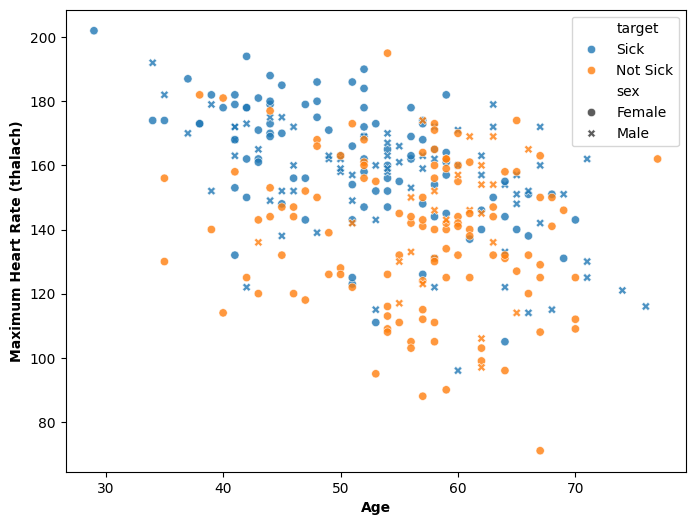

In [ ]:
df_scatter = df.copy()
df_scatter['sex'] = df_scatter['sex'].map({0:'Male', 1:'Female'})
df_scatter['target'] = df_scatter['target'].map({0:'Not Sick', 1:'Sick'})

plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='thalach', data=df_scatter, hue='target', style='sex', alpha=0.8)
plt.xlabel('Age', weight='bold')
plt.ylabel('Maximum Heart Rate (thalach)', weight='bold')
plt.show()

#### **Distribusi CA (Pembuluh Darah Utama Terdeteksi) Berdasarkan Exang (Nyeri Dada Setelah Olahraga)**

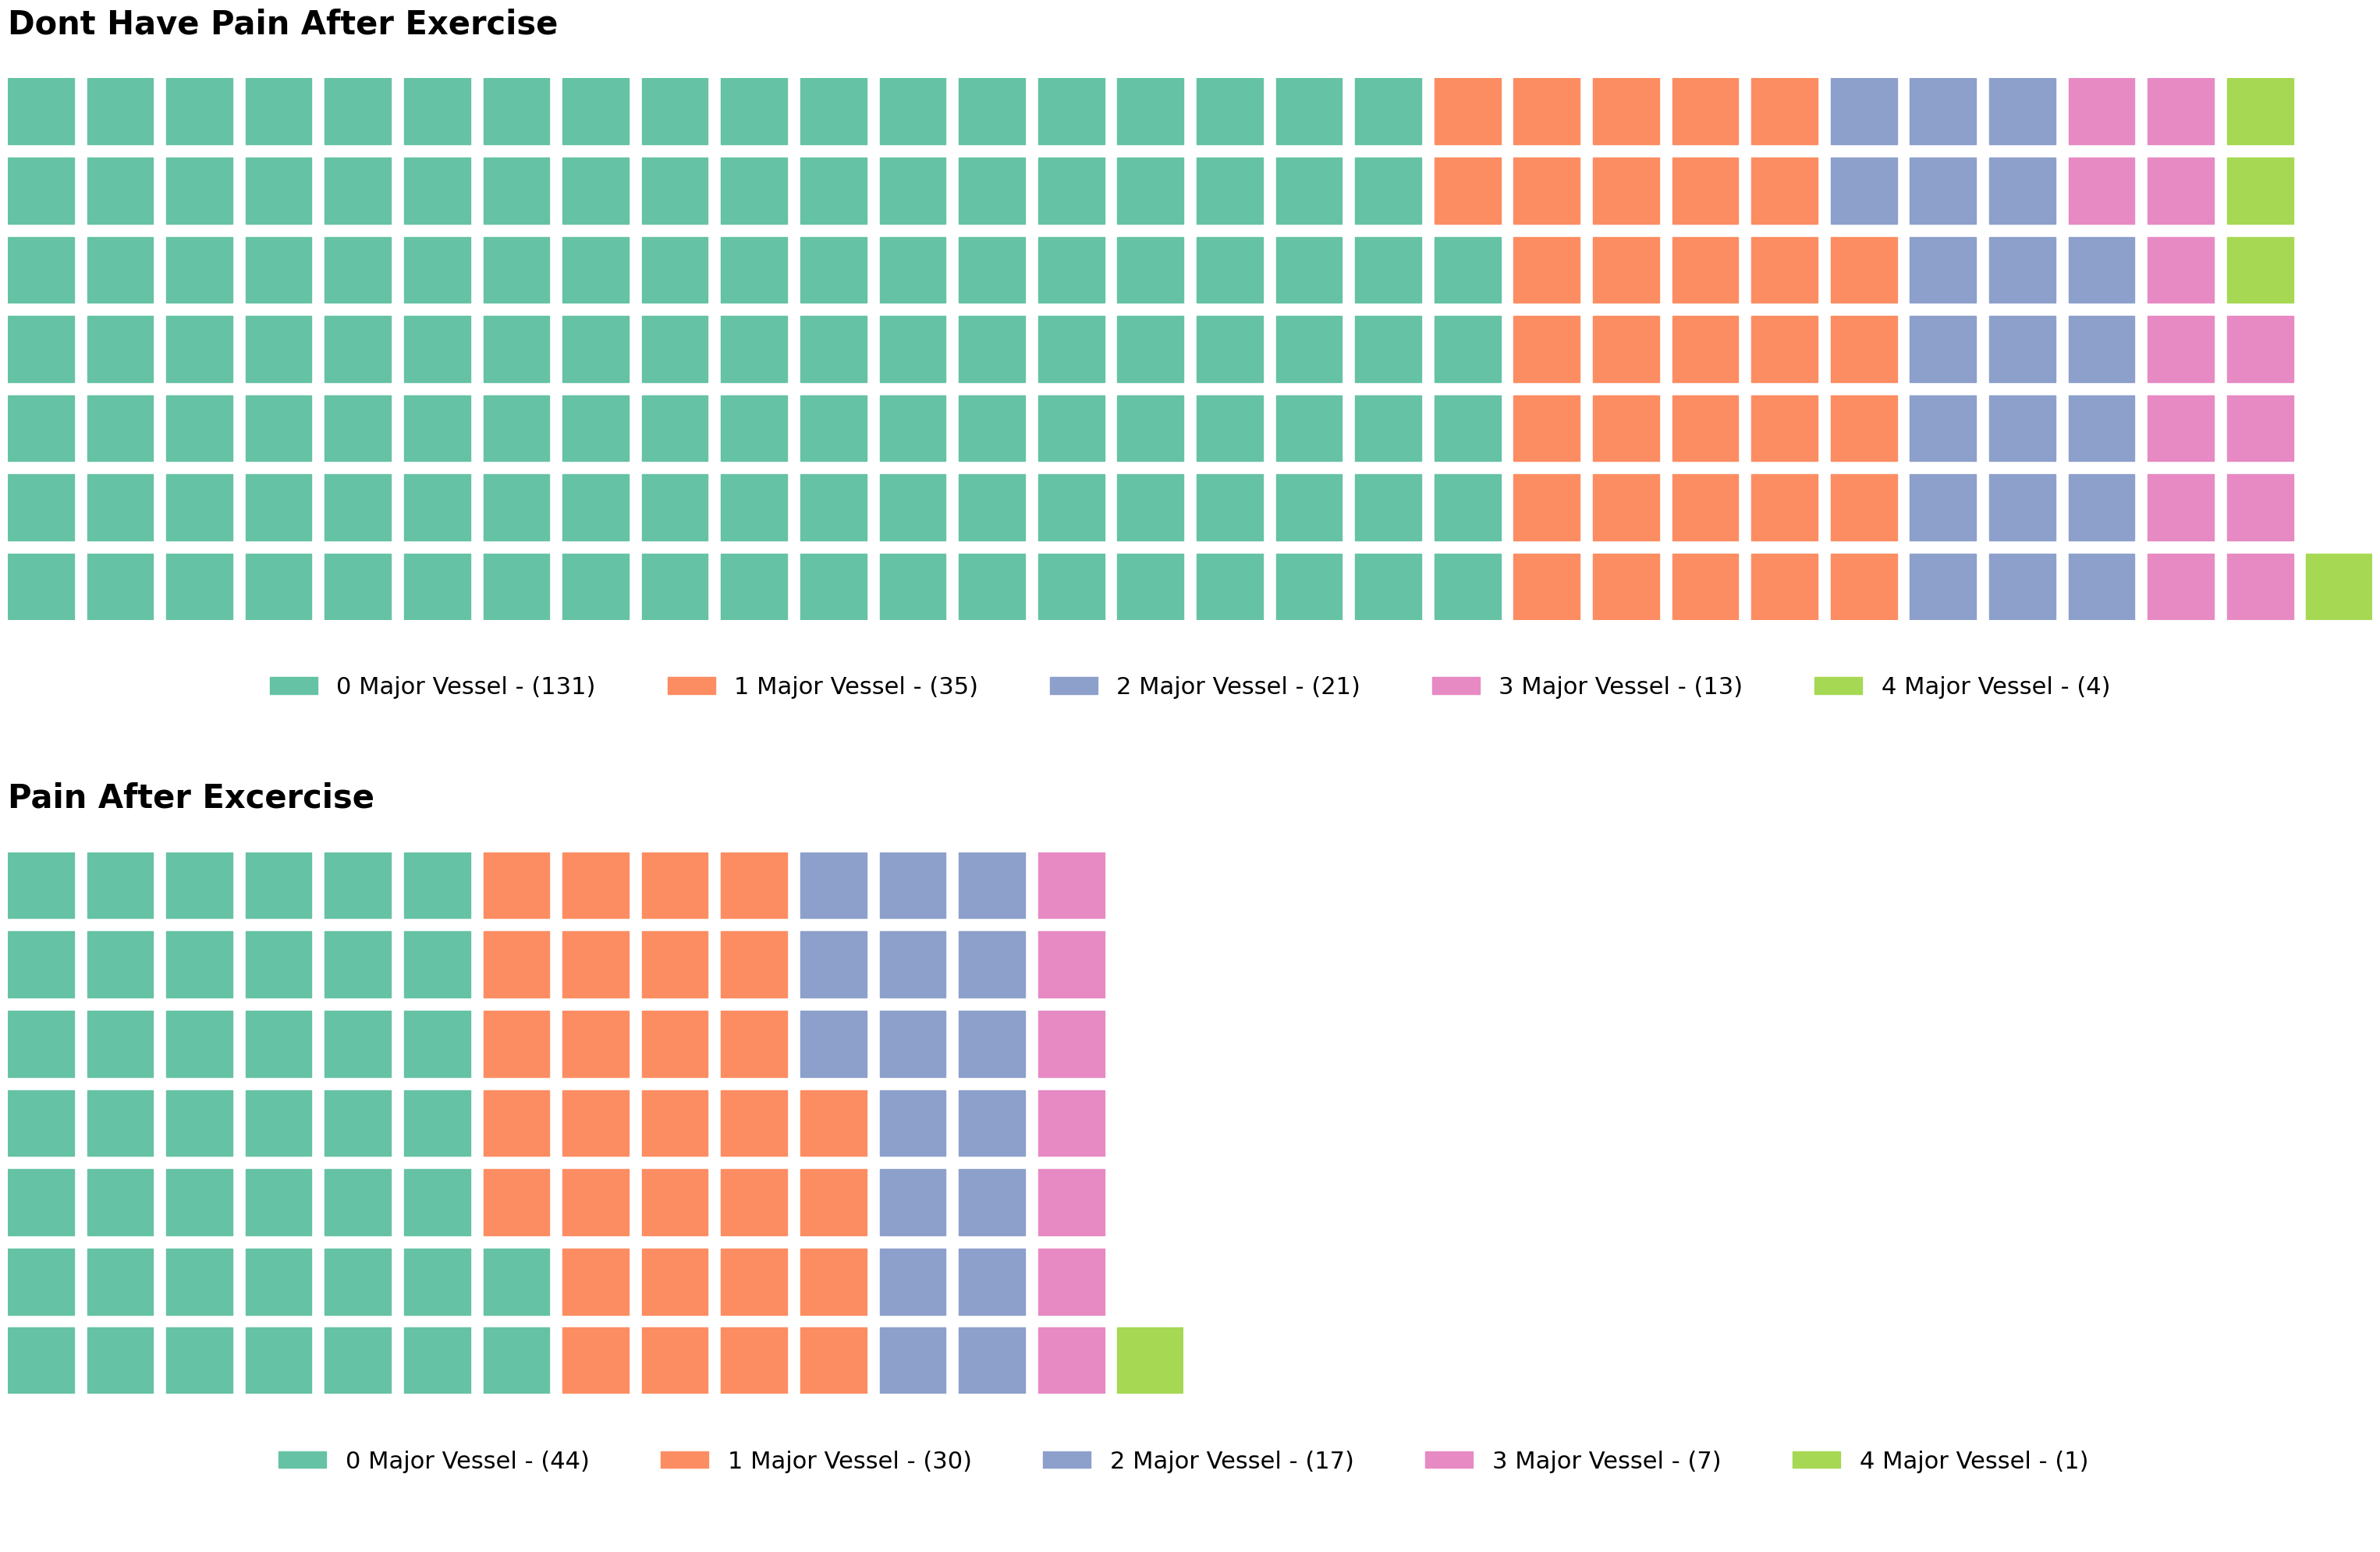

In [ ]:
df_eda4 = df[['exang', 'ca']]
df_eda4 = pd.DataFrame(df_eda4.groupby(['exang', 'ca']).size().reset_index(name='total'))
df_eda4_0 = df_eda4.query(f'exang == 0').drop(['exang', 'ca'], axis=1).reset_index(drop=True)
df_eda4_1 = df_eda4.query(f'exang == 1').drop(['exang', 'ca'], axis=1).reset_index(drop=True)

suptitle = dict(x=0.3, y=1.07, fontsize=48, weight='heavy', ha='center', va='center')
title = dict(x=0.3, y=1.01, fontsize=30, weight='normal', ha='center', va='bottom')
title_pywaffle = dict(loc='left', fontsize=30, weight='bold')
legend_pywaffle = dict(loc='upper center', fontsize=22, ncol=5, borderpad=3, frameon=False, columnspacing=3)

fig = plt.figure(FigureClass=Waffle,
    plots={211: {'values': df_eda4_0['total'],
                 'labels': [f"{key} Major Vessel - ({value})" for key, value in df_eda4_0['total'].items()],
                 'legend': {'bbox_to_anchor': (0.5, 0.05), **legend_pywaffle},
                 'title': {'label': "Dont Have Pain After Exercise\n", **title_pywaffle}}
           , 212: {'values': df_eda4_1['total'],
                   'labels': [f"{key} Major Vessel - ({value})" for key, value in df_eda4_1['total'].items()],
                   'legend': {'bbox_to_anchor': (1, 0.05), **legend_pywaffle},
                   'title': {'label': "Pain After Excercise\n", **title_pywaffle}}
          }, figsize=(50, 20), rows=7,  rounding_rule='ceil')
fig.tight_layout()
plt.show();